<a href="https://colab.research.google.com/github/AnomaliJawa/Computational-Biology/blob/main/Material01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install py3Dmol==2.0.1.post1

In [2]:
pip install python-Levenshtein==0.20.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.9 MB/s eta 0:00:00


In [3]:
pip install matplotlib

In [4]:
pip install numpy

In [5]:
pip install biopython==1.78

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 95.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for biopython: filename=biopython-1.78-cp311-cp311-linux_x86_64.whl size=2527272 sha256=9fb7ae3bfa9a96a362019f77040cc08bc7cf4276ce69bb4051b9e860708c7e8e
  Stored in directory: /root/.cache/pip/wheels/ca/09/da/77d9ed7c7ad07643933fcb68c45e07acd9b61de4436ee4be7b
Successfully built biopython


In [6]:
from Bio.Seq import Seq

In [7]:
sequence = Seq("CGATCGATCGATCGATCGATCGATCGAT")
print(sequence)

CGATCGATCGATCGATCGATCGATCGAT


In [8]:
def get_gc_composition(sequence):
    gc_list = []
    for nucleotide in sequence:
        if nucleotide in ["G", "C"]:
            gc_list.append(nucleotide)

    # Get percentage from GC
    return len(gc_list) / len(sequence) * 100

gc_composition = get_gc_composition(sequence)
print(gc_composition)

50.0


In [10]:
from Bio.SeqUtils import GC

gc_percentage = GC(sequence)
at_percentage = 100 - gc_percentage

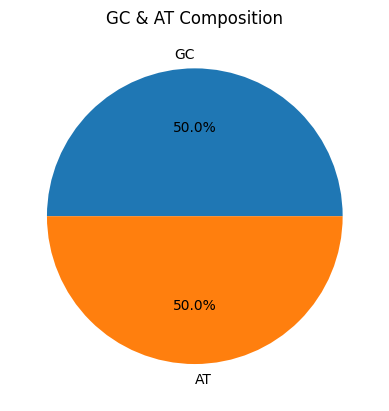

In [12]:
import matplotlib.pyplot as plt

percentages = [gc_percentage, at_percentage]
labels = ["GC", "AT"]

plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.title("GC & AT Composition")
plt.show()

In [13]:
def get_melting_point(sequence):
    A_count = sequence.count("A")
    C_count = sequence.count("C")
    G_count = sequence.count("G")
    T_count = sequence.count("T")

    if len(sequence) < 14:
        return (A_count + T_count) * 2 (G_count + C_count) * 4
    else:
        return 64.9 +41 * (G_count + C_count - 16.4) / len(sequence)

melting_point = get_melting_point(sequence)
print(melting_point)

61.38571428571429


<>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-13-524b9948e30e>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return (A_count + T_count) * 2 (G_count + C_count) * 4


In [14]:
from Bio.SeqUtils import MeltingTemp as mt

mt_wallace = mt.Tm_Wallace(sequence)
mt_gc = mt.Tm_GC(sequence)
mt_NN = mt.Tm_NN(sequence)

print(f"MT Wallace: {mt_wallace}")
print(f"MT GC: {mt_gc}")
print(f"MT NN: {mt_NN}")

MT Wallace: 84.0
MT GC: 58.72632083684374
MT NN: 60.17162906686747


In [15]:
from Bio.SeqUtils import molecular_weight

mw = molecular_weight(sequence)
print(f"Molecular Weight: {mw}")

Molecular Weight: 8668.527100000001


In [23]:
# Import yang dibutuhkan
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight

def get_nucleotide_sequence(sequence, nucleotide):
    """
    Extracts a specific nucleotide from a Bio.Seq.Seq object.

    Args:
        sequence (Bio.Seq.Seq): The input nucleotide sequence.
        nucleotide (str): The nucleotide to extract (e.g., "A", "T", "G", "C").

    Returns:
        Seq: A new Bio.Seq.Seq object with only the specified nucleotide.
    """
    # Buat list kosong untuk menyimpan hasil ekstraksi
    extracted_nucleotides = [base for base in sequence if base == nucleotide]
    return Seq("".join(extracted_nucleotides))

# Contoh input sequence
sequence = Seq("CGATCGATCGATCGATCGATCGATCGAT")

# Ekstraksi masing-masing nukleotida
nucleotide_seq_A = get_nucleotide_sequence(sequence, "A")
nucleotide_seq_T = get_nucleotide_sequence(sequence, "T")
nucleotide_seq_G = get_nucleotide_sequence(sequence, "G")
nucleotide_seq_C = get_nucleotide_sequence(sequence, "C")

# Cetak hasil ekstraksi
print(f"Nucleotide A sequence: {nucleotide_seq_A}")
print(f"Nucleotide T sequence: {nucleotide_seq_T}")
print(f"Nucleotide G sequence: {nucleotide_seq_G}")
print(f"Nucleotide C sequence: {nucleotide_seq_C}")

# Hitung dan tampilkan berat molekul masing-masing
mw_A = molecular_weight(nucleotide_seq_A)
mw_T = molecular_weight(nucleotide_seq_T)
mw_G = molecular_weight(nucleotide_seq_G)
mw_C = molecular_weight(nucleotide_seq_C)

print(f"Molecular weight of A sequence: {mw_A}")
print(f"Molecular weight of T sequence: {mw_T}")
print(f"Molecular weight of G sequence: {mw_G}")
print(f"Molecular weight of C sequence: {mw_C}")


Nucleotide A sequence: AAAAAAA
Nucleotide T sequence: TTTTTTT
Nucleotide G sequence: GGGGGGG
Nucleotide C sequence: CCCCCCC
Molecular weight of A sequence: 2210.4608
Molecular weight of T sequence: 2147.3677
Molecular weight of G sequence: 2322.4566
Molecular weight of C sequence: 2042.2878999999996


In [22]:
mw_G = molecular_weight(nucleotide_seq_G)
mw_C = molecular_weight(nucleotide_seq_C)
mw_A = molecular_weight(nucleotide_seq_A)
mw_T = molecular_weight(nucleotide_seq_T)